In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_merged = pd.read_csv('Customer_merged.csv', index_col=0)
df_merged

,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month
Loyalty_Number,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999902,2018,12,0,0,0,0,0.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
999911,2018,12,0,0,0,0,0.0,0,0,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
999940,2018,12,3,0,3,1233,123.0,0,0,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [11]:
df_anios = df_merged.groupby(['Year','Month'])['Flights_Booked'].sum().reset_index()
df_anios

,Year,Month,Flights_Booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


In [19]:
df_2017 = df_anios[df_anios['Year'] == 2017]
df_2017


,Year,Month,Flights_Booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


In [24]:
df_2018 = df_anios[df_anios['Year'] == 2018]
df_2018

,Year,Month,Flights_Booked
12,2018,1,49170
13,2018,2,48643
14,2018,3,66928
15,2018,4,56791
16,2018,5,76891
17,2018,6,92749
18,2018,7,104143
19,2018,8,90512
20,2018,9,73075
21,2018,10,69110


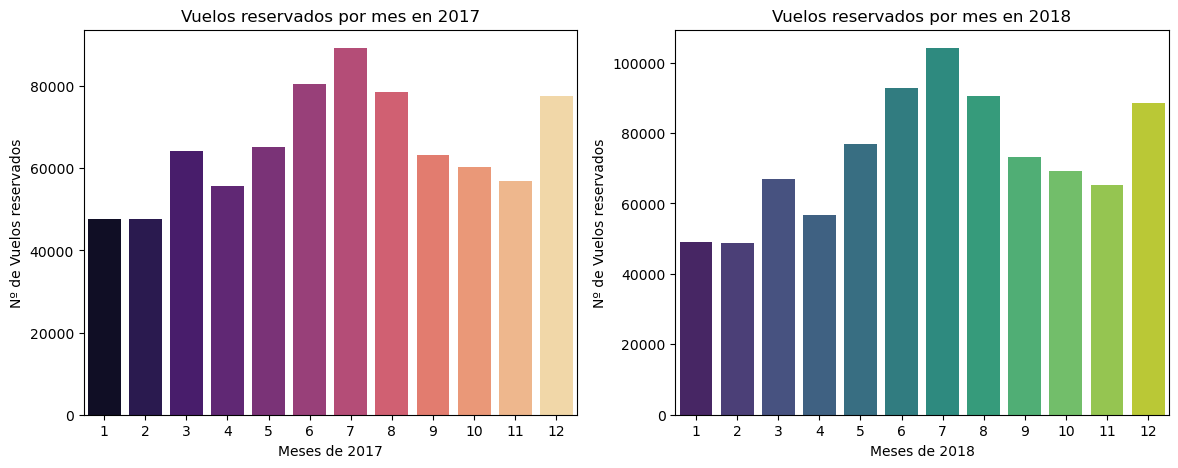

In [30]:
#vamos a crear subplots, para que se vean los dos años, una fila y dos columnas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#para el año 2017
sns.barplot(x = "Month",
              y= "Flights_Booked", 
              data = df_2017, 
              palette = "magma",
              ax=axes[0]) #para que la gráfica salga en primera posición
axes[0].set_xlabel("Meses de 2017")
axes[0].set_ylabel("Nº de Vuelos reservados")
axes[0].set_title("Vuelos reservados por mes en 2017"); 

#para el año 2018
sns.barplot(x = "Month",
              y= "Flights_Booked", 
              data = df_2018, 
              palette = "viridis",
              ax=axes[1])
axes[1].set_xlabel("Meses de 2018")
axes[1].set_ylabel("Nº de Vuelos reservados")
axes[1].set_title("Vuelos reservados por mes en 2018"); 

In [ ]:
#comentar que los puntos máximos de reservas de vuelos de ambos años coinciden con los meses de vacaciones en verano
#y navidad, la pasqua es cambiante, según el año, y ahí se puede ver alterado según el mes que cae. Los meses con menos 
#reservas de vuelos son Enero y Febrero y Julio es el máximos. 

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

3.  ¿Cuál es la distribución de los clientes por provincia o estado?

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

6. ¿Cómo se distribuyen los clientes según su estado civil y género?